## Fertilizer Recommendation

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import sklearn.tree as tree
import pickle

In [2]:
df = pd.read_csv('Fertilizer.csv')

In [3]:
df.head(20)

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,26,52,38,Sandy,Maize,37,0,0,Urea
1,29,52,45,Loamy,Sugarcane,12,0,36,DAP
2,34,65,62,Black,Cotton,7,9,30,14-35-14
3,32,62,34,Red,Tobacco,22,0,20,28-28
4,28,54,46,Clayey,Paddy,35,0,0,Urea
5,26,52,35,Sandy,Barley,12,10,13,17-17-17
6,25,50,64,Red,Cotton,9,0,10,20-20
7,33,64,50,Loamy,Wheat,41,0,0,Urea
8,30,60,42,Sandy,Millets,21,0,18,28-28
9,29,58,33,Black,Oil seeds,9,7,30,14-35-14


In [4]:
df.dtypes

Temparature         int64
Humidity            int64
Moisture            int64
Soil Type          object
Crop Type          object
Nitrogen            int64
Potassium           int64
Phosphorous         int64
Fertilizer Name    object
dtype: object

In [5]:
df.describe()

,Temparature,Humidity,Moisture,Nitrogen,Potassium,Phosphorous
count,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000
mean,30.282828,59.151515,43.181818,18.909091,3.383838,18.606061
std,3.502304,5.840331,11.271568,11.599693,5.814667,13.476978
min,25.000000,50.000000,25.000000,4.000000,0.000000,0.000000
25%,28.000000,54.000000,34.000000,10.000000,0.000000,9.000000
50%,30.000000,60.000000,41.000000,13.000000,0.000000,19.000000
75%,33.000000,64.000000,50.500000,24.000000,7.500000,30.000000
max,38.000000,72.000000,65.000000,42.000000,19.000000,42.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Temparature      99 non-null     int64 
 1   Humidity         99 non-null     int64 
 2   Moisture         99 non-null     int64 
 3   Soil Type        99 non-null     object
 4   Crop Type        99 non-null     object
 5   Nitrogen         99 non-null     int64 
 6   Potassium        99 non-null     int64 
 7   Phosphorous      99 non-null     int64 
 8   Fertilizer Name  99 non-null     object
dtypes: int64(6), object(3)
memory usage: 7.1+ KB


In [7]:
df.corr()

/var/folders/6_/d64j4bhs26jbr7lwkgd6qyz00000gn/T/ipykernel_25918/1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Temparature,Humidity,Moisture,Nitrogen,Potassium,Phosphorous
Temparature,1.000000,0.973164,0.091222,-0.033771,-0.023424,0.207545
Humidity,0.973164,1.000000,0.091342,-0.060646,-0.003833,0.204044
Moisture,0.091222,0.091342,1.000000,-0.095945,0.027727,0.009276
Nitrogen,-0.033771,-0.060646,-0.095945,1.000000,-0.500087,-0.686971
Potassium,-0.023424,-0.003833,0.027727,-0.500087,1.000000,0.089192
Phosphorous,0.207545,0.204044,0.009276,-0.686971,0.089192,1.000000


In [8]:
df = df.rename(columns={'Humidity ': 'Humidity'})

In [9]:
count_dups = df.duplicated().sum()
print("Number of Duplicates: ", count_dups)
if count_dups >= 1:
    df.drop_duplicates(inplace=True)
    print('Duplicate values removed!')
else:
    print('No Duplicate values')

Number of Duplicates:  0
No Duplicate values


### Lets find out unique Fertliliser 

In [10]:
df['Fertilizer Name'].unique()

array(['Urea', 'DAP', '14-35-14', '28-28', '17-17-17', '20-20',
       '10-26-26'], dtype=object)

In [11]:
df['Soil Type'].unique()

array(['Sandy', 'Loamy', 'Black', 'Red', 'Clayey'], dtype=object)

In [12]:
df['Crop Type'].unique()

array(['Maize', 'Sugarcane', 'Cotton', 'Tobacco', 'Paddy', 'Barley',
       'Wheat', 'Millets', 'Oil seeds', 'Pulses', 'Ground Nuts'],
      dtype=object)

## Data Visualisation

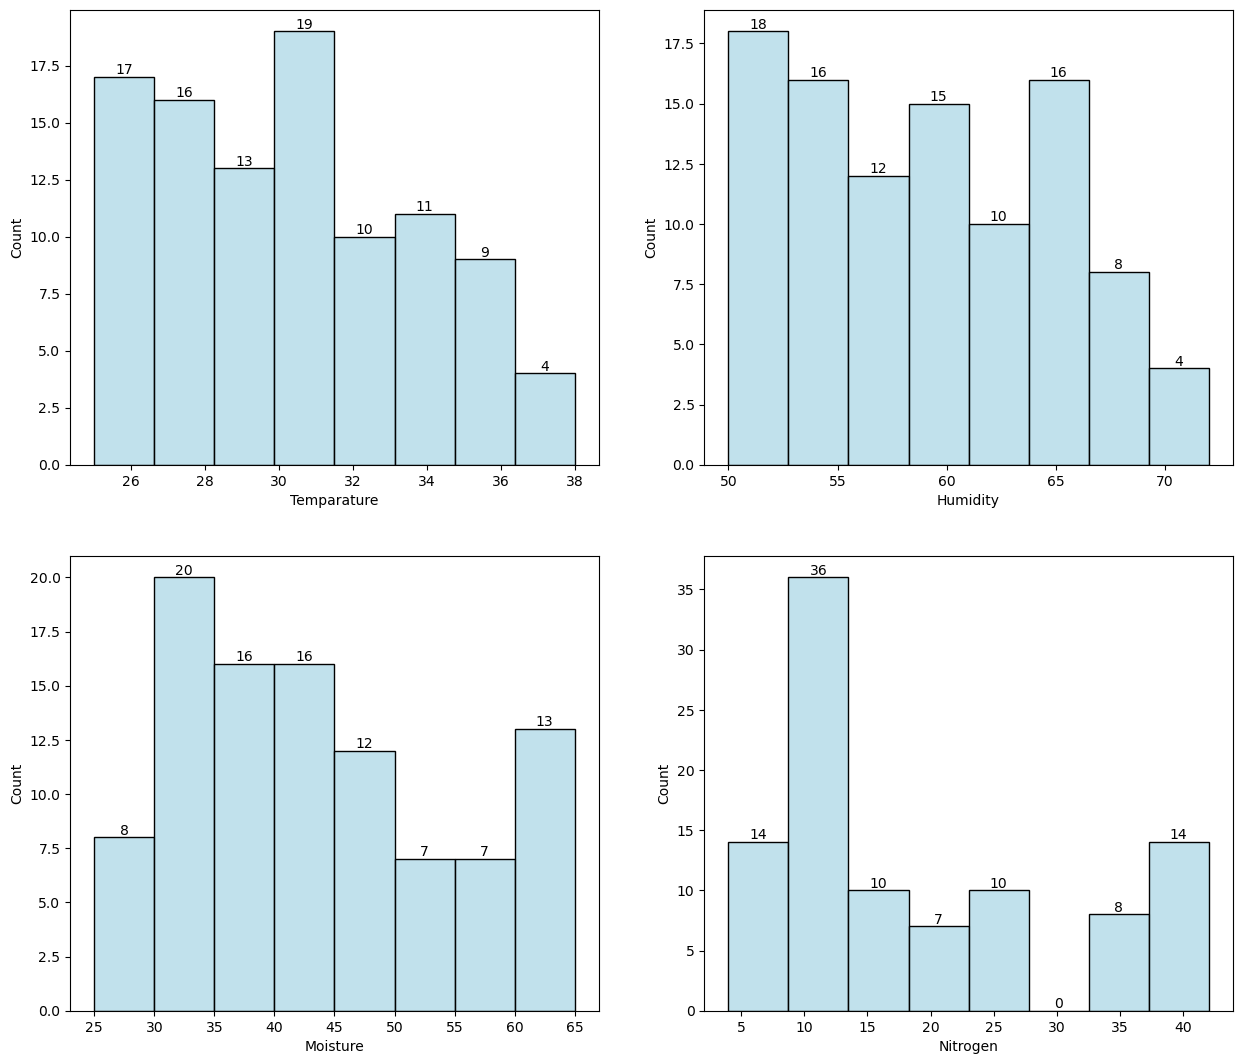

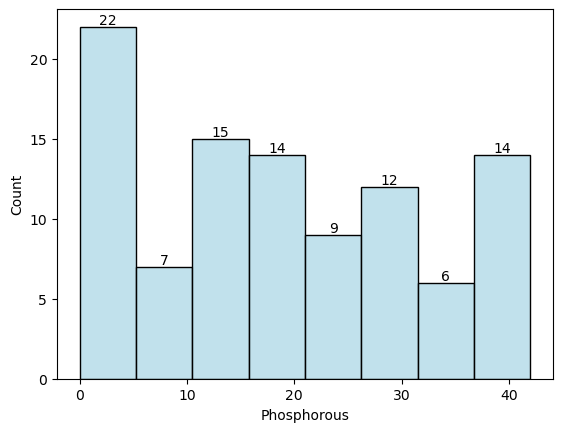

In [13]:
columns = ['Temparature','Humidity','Moisture','Nitrogen','Phosphorous']

plt.figure(figsize=(15,13))
i = 1
for column in columns[:-1]:
    plt.subplot(2,2,i)
    ax=sns.histplot(df[column],color='lightblue')
    ax.bar_label(ax.containers[0],fontsize=10)
    i+=1
plt.show()

ax=sns.histplot(df[columns[-1]],color='lightblue')
ax.bar_label(ax.containers[0],fontsize=10)
plt.show()

In [14]:
soil_type_label_encoder = LabelEncoder()
df["Soil Type"] = soil_type_label_encoder.fit_transform(df["Soil Type"])
crop_type_label_encoder = LabelEncoder()
df["Crop Type"] = crop_type_label_encoder.fit_transform(df["Crop Type"])
fertname_label_encoder = LabelEncoder()
df["Fertilizer Name"] = fertname_label_encoder.fit_transform(df["Fertilizer Name"])

In [15]:
df.head(20)

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,26,52,38,4,3,37,0,0,6
1,29,52,45,2,8,12,0,36,5
2,34,65,62,0,1,7,9,30,1
3,32,62,34,3,9,22,0,20,4
4,28,54,46,1,6,35,0,0,6
5,26,52,35,4,0,12,10,13,2
6,25,50,64,3,1,9,0,10,3
7,33,64,50,2,10,41,0,0,6
8,30,60,42,4,4,21,0,18,4
9,29,58,33,0,5,9,7,30,1


In [16]:
df['Soil Type'].unique()

array([4, 2, 0, 3, 1])

In [17]:
df['Crop Type'].unique()

array([ 3,  8,  1,  9,  6,  0, 10,  4,  5,  7,  2])

## Building the Model

In [18]:
X = df[df.columns[:-1]]
y = df[df.columns[-1]]

In [19]:
#Splitting the data into train and test dataset.
X_train, X_test, y_train, y_test = train_test_split(X.values, y, test_size = 0.2, random_state = 0)
print(f"Train Data: {X_train.shape}, {y_train.shape}")
print(f"Train Data: {X_test.shape}, {y_test.shape}")

Train Data: (79, 8), (79,)
Train Data: (20, 8), (20,)


## Decision Tree

In [20]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0, max_depth=6)

y_pred = clf.fit(X_train, y_train).predict(X_test)
accuracy_score(y_test, y_pred)*100

90.0

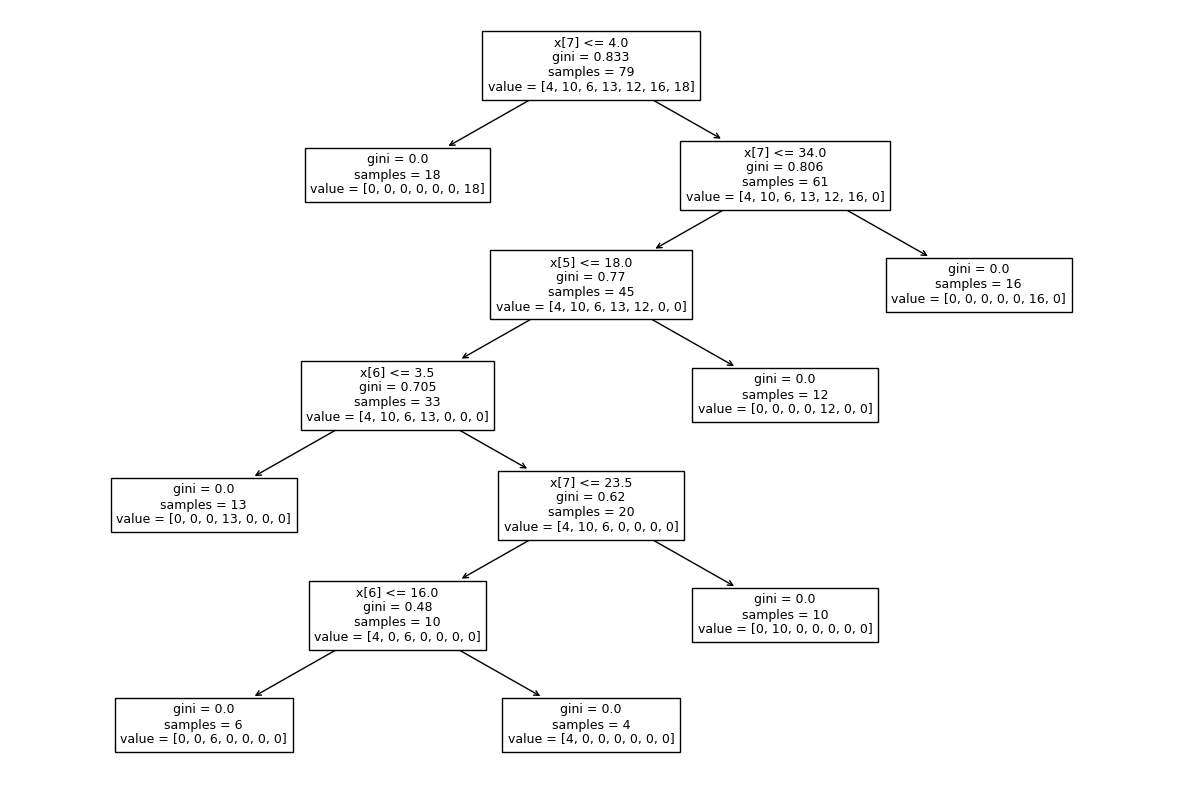

In [21]:
fig, ax = plt.subplots(figsize=(15, 10))
tree.plot_tree(clf,ax=ax,fontsize=9)
plt.show()

## KNN

In [22]:
from sklearn.neighbors import  KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors=1)
y_pred = KNN.fit(X_train, y_train).predict(X_test)
accuracy_score(y_test, y_pred) * 100

95.0

## Logistic Regression

In [23]:
from sklearn.linear_model import LogisticRegression

In [24]:
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)

In [25]:
y_pred = LR.fit(X_train, y_train).predict(X_test)

In [26]:
accuracy_score(y_test, y_pred) * 100

90.0

In [27]:
pickle.dump(KNN, open('Fertlizer.pkl', 'wb'))